<a href="https://colab.research.google.com/github/leocosta1703/mba_fiap/blob/main/Aula00_MBA_EstatisticaDescritiva%20-%20leocosta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Completa de Dados de Negócios - Superstore

## **1. Introdução e Importação de Bibliotecas**

Este notebook apresenta uma análise estatística completa de um dataset de negócios, aplicando conceitos fundamentais de estatística descritiva e análise exploratória de dados.

Link Dataset: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

In [ ]:
df = pd.read_csv("Superstore.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# Carregamento do dataset
# Para este exemplo, vamos criar dados sintéticos similares ao Superstore

#np.random.seed(42)

# Criando dataset sintético para demonstração
#n_samples = 1000
#categories = ['Technology', 'Furniture', 'Office Supplies']
#regions = ['East', 'West', 'Central', 'South']
#segments = ['Consumer', 'Corporate', 'Home Office']

#data = {
  #  'Category': np.random.choice(categories, n_samples),
  #  'Region': np.random.choice(regions, n_samples),
  #  'Segment': np.random.choice(segments, n_samples),
  #  'Sales': np.random.lognormal(mean=6, sigma=1, size=n_samples),
  #  'Quantity': np.random.poisson(lam=3, size=n_samples) + 1,
  #  'Discount': np.random.beta(2, 8, n_samples) * 0.8
#}

#df = pd.DataFrame(data)
#df['Profit'] = df['Sales'] * (0.2 - df['Discount'] * 0.5) + np.random.normal(0, 50, n_samples)

# Visualização inicial dos dados
#print("Forma do dataset:", df.shape)
#print("\nPrimeiras 5 linhas:")
#df.head()

In [ ]:
# Informações gerais sobre o dataset
print("Informações do Dataset:")
df.info()
print("\nEstatísticas descritivas básicas:")
df.describe()

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 2. Fundamentos Teóricos

### 2.1 Medidas de Tendência Central

**Média Aritmética**: É o valor obtido pela soma de todos os valores dividido pelo número de observações.
- Fórmula: x̄ = Σxi / n
- **Vantagem**: Utiliza todos os valores da amostra
- **Desvantagem**: Sensível a valores extremos (outliers)

**Mediana**: É o valor que divide a distribuição em duas partes iguais (50º percentil).
- **Vantagem**: Não é afetada por valores extremos
- **Uso**: Recomendada para distribuições assimétricas

**Moda**: É o valor que aparece com maior frequência na distribuição.
- **Uso**: Especialmente útil para dados categóricos
- Pode haver distribuições amodais, unimodais, bimodais ou multimodais

### 2.2 Medidas de Dispersão

**Desvio Padrão (σ ou s)**: Mede a dispersão dos dados em relação à média.
- Fórmula: σ = √[Σ(xi - x̄)² / n]
- **Interpretação**: Quanto maior o desvio padrão, maior a variabilidade

**Coeficiente de Variação (CV)**: Medida relativa de dispersão.
- Fórmula: CV = (σ / x̄) × 100%
- **Interpretação**:
  - CV < 15%: Baixa variabilidade
  - 15% ≤ CV < 30%: Média variabilidade  
  - CV ≥ 30%: Alta variabilidade

### 2.3 Medidas de Forma

**Assimetria (Skewness)**: Mede o grau de assimetria da distribuição.
- **Skewness = 0**: Distribuição simétrica
- **Skewness > 0**: Assimetria positiva (cauda à direita)
- **Skewness < 0**: Assimetria negativa (cauda à esquerda)

**Curtose (Kurtosis)**: Mede o achatamento da distribuição.
- **Kurtosis = 3**: Distribuição normal (mesocúrtica)
- **Kurtosis > 3**: Distribuição pontiaguda (leptocúrtica)
- **Kurtosis < 3**: Distribuição achatada (platicúrtica)

## 3. Análise Univariada

### 3.1 Análise da Variável "Sales" (Vendas)

In [ ]:
# Estatísticas descritivas para Sales
sales = df['Sales']

print("=== ANÁLISE UNIVARIADA - VENDAS ===")
print(f"Média: ${sales.mean():.2f}")
print(f"Mediana: ${sales.median():.2f}")
print(f"Moda: ${sales.mode().values[0]:.2f}")
print(f"Desvio Padrão: ${sales.std():.2f}")
print(f"Coeficiente de Variação: {(sales.std()/sales.mean())*100:.2f}%")
print(f"Assimetria: {sales.skew():.2f}")
print(f"Curtose: {sales.kurtosis():.2f}")
print(f"Mínimo: ${sales.min():.2f}")
print(f"Máximo: ${sales.max():.2f}")

=== ANÁLISE UNIVARIADA - VENDAS ===
Média: $229.86
Mediana: $54.49
Moda: $12.96
Desvio Padrão: $623.25
Coeficiente de Variação: 271.14%
Assimetria: 12.97
Curtose: 305.31
Mínimo: $0.44
Máximo: $22638.48


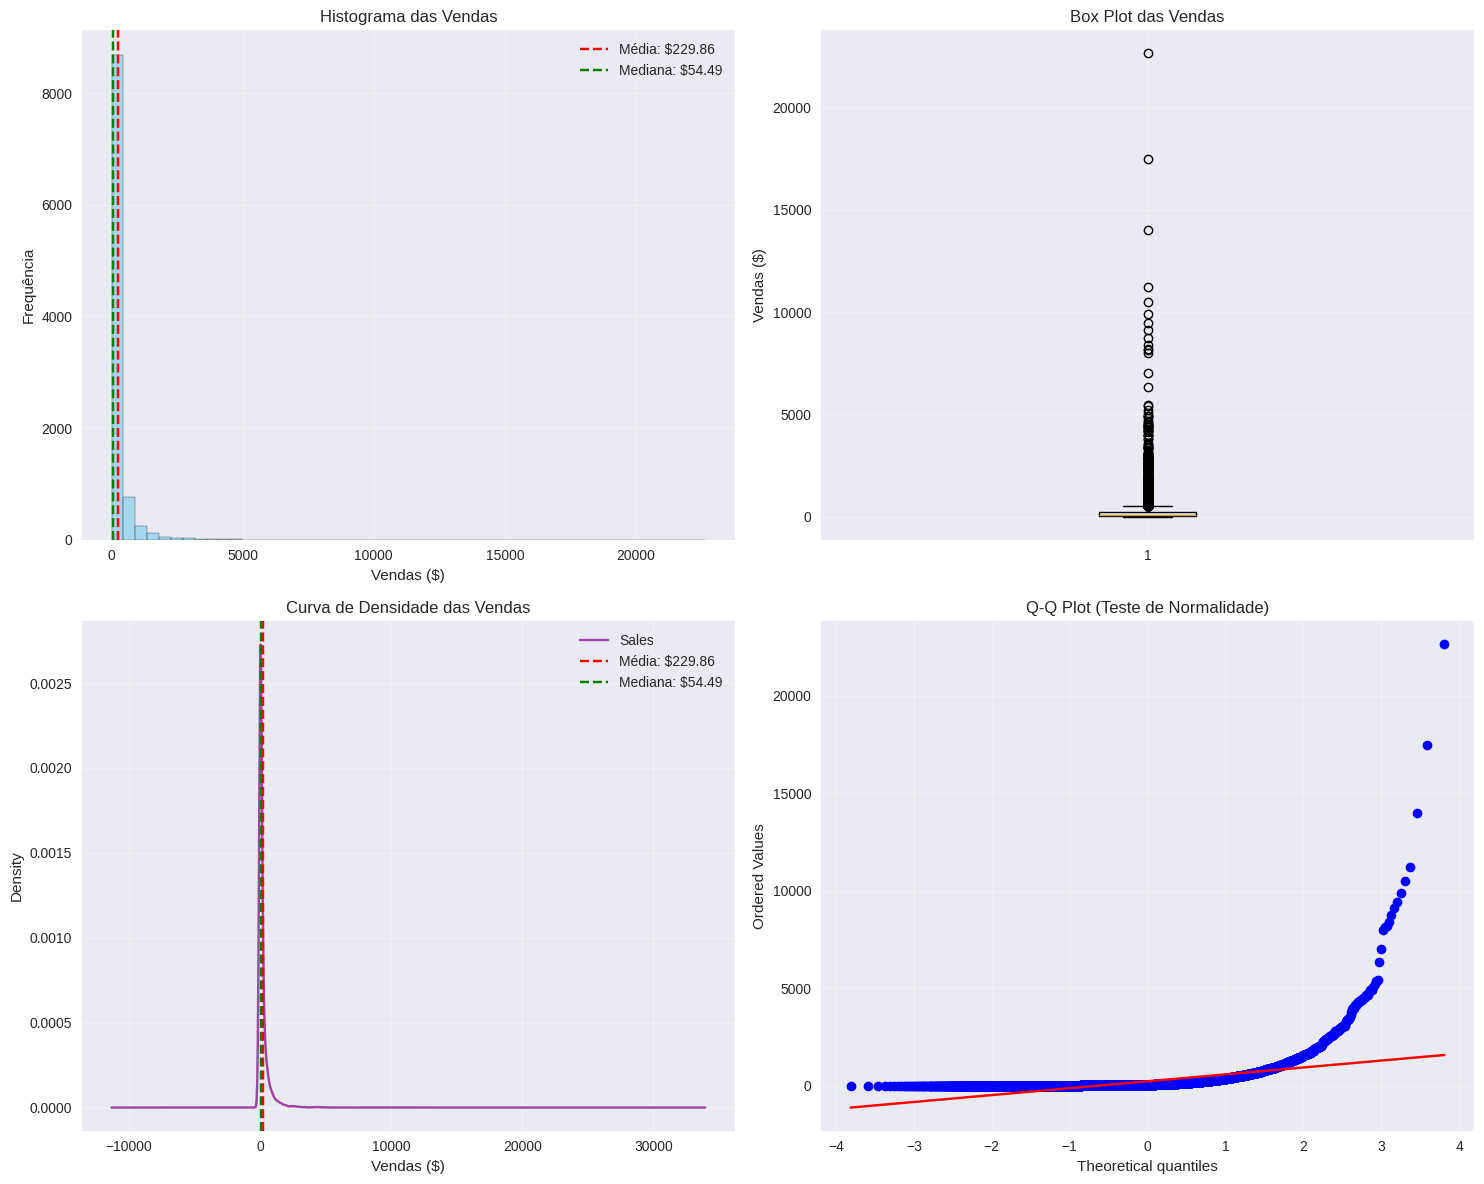

In [ ]:
# Histograma das Vendas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Histograma
ax1.hist(sales, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(sales.mean(), color='red', linestyle='--', label=f'Média: ${sales.mean():.2f}')
ax1.axvline(sales.median(), color='green', linestyle='--', label=f'Mediana: ${sales.median():.2f}')
ax1.set_title('Histograma das Vendas')
ax1.set_xlabel('Vendas ($)')
ax1.set_ylabel('Frequência')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box Plot
ax2.boxplot(sales)
ax2.set_title('Box Plot das Vendas')
ax2.set_ylabel('Vendas ($)')
ax2.grid(True, alpha=0.3)

# Densidade
sales.plot.density(ax=ax3, color='purple', alpha=0.7)
ax3.axvline(sales.mean(), color='red', linestyle='--', label=f'Média: ${sales.mean():.2f}')
ax3.axvline(sales.median(), color='green', linestyle='--', label=f'Mediana: ${sales.median():.2f}')
ax3.set_title('Curva de Densidade das Vendas')
ax3.set_xlabel('Vendas ($)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Q-Q Plot para normalidade
stats.probplot(sales, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot (Teste de Normalidade)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Análise da Variável "Profit" (Lucro)

In [ ]:
# Estatísticas descritivas para Profit
profit = df['Profit']

print("=== ANÁLISE UNIVARIADA - LUCRO ===")
print(f"Média: ${profit.mean():.2f}")
print(f"Mediana: ${profit.median():.2f}")
print(f"Desvio Padrão: ${profit.std():.2f}")
print(f"Coeficiente de Variação: {abs((profit.std()/profit.mean())*100):.2f}%")
print(f"Assimetria: {profit.skew():.2f}")
print(f"Curtose: {profit.kurtosis():.2f}")
print(f"Mínimo: ${profit.min():.2f}")
print(f"Máximo: ${profit.max():.2f}")

=== ANÁLISE UNIVARIADA - LUCRO ===
Média: $28.66
Mediana: $8.67
Desvio Padrão: $234.26
Coeficiente de Variação: 817.47%
Assimetria: 7.56
Curtose: 397.19
Mínimo: $-6599.98
Máximo: $8399.98


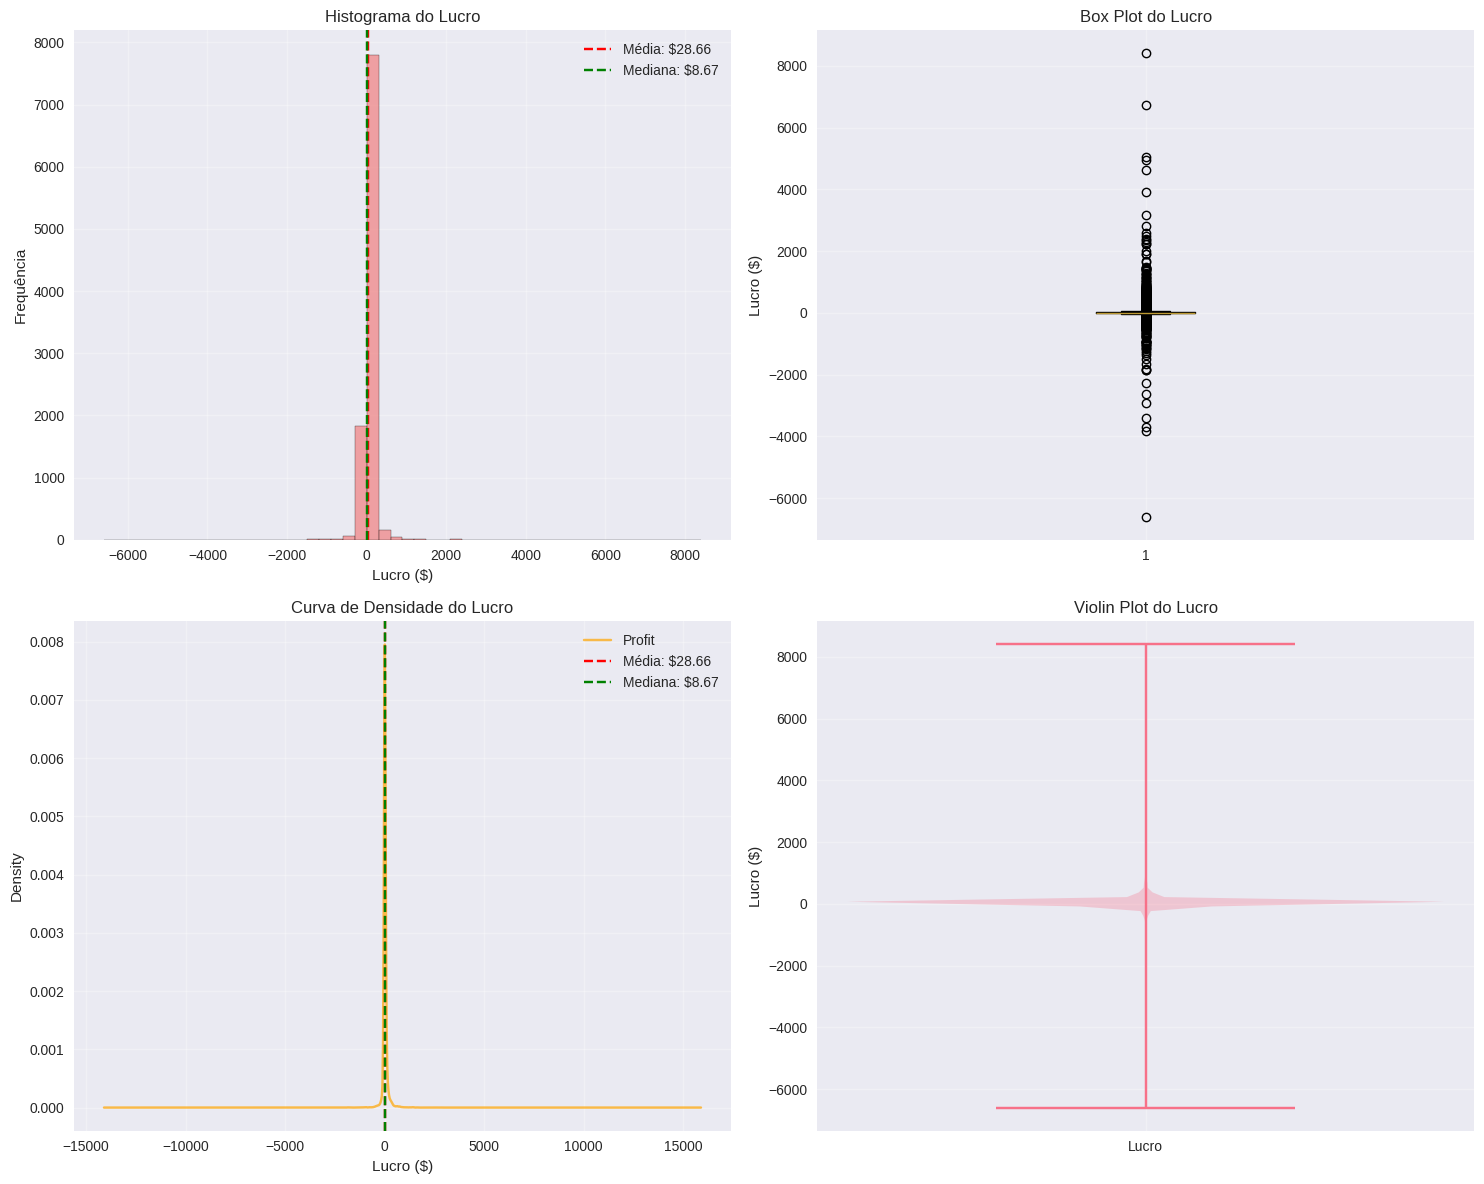

In [ ]:
# Visualizações do Lucro
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Histograma
ax1.hist(profit, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax1.axvline(profit.mean(), color='red', linestyle='--', label=f'Média: ${profit.mean():.2f}')
ax1.axvline(profit.median(), color='green', linestyle='--', label=f'Mediana: ${profit.median():.2f}')
ax1.set_title('Histograma do Lucro')
ax1.set_xlabel('Lucro ($)')
ax1.set_ylabel('Frequência')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box Plot
ax2.boxplot(profit)
ax2.set_title('Box Plot do Lucro')
ax2.set_ylabel('Lucro ($)')
ax2.grid(True, alpha=0.3)

# Densidade
profit.plot.density(ax=ax3, color='orange', alpha=0.7)
ax3.axvline(profit.mean(), color='red', linestyle='--', label=f'Média: ${profit.mean():.2f}')
ax3.axvline(profit.median(), color='green', linestyle='--', label=f'Mediana: ${profit.median():.2f}')
ax3.set_title('Curva de Densidade do Lucro')
ax3.set_xlabel('Lucro ($)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Violin Plot
ax4.violinplot([profit.dropna()], positions=[1])
ax4.set_title('Violin Plot do Lucro')
ax4.set_ylabel('Lucro ($)')
ax4.set_xticks([1])
ax4.set_xticklabels(['Lucro'])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Análise de Variáveis Categóricas

In [ ]:
# Análise da categoria de produtos
print("=== ANÁLISE DE VARIÁVEIS CATEGÓRICAS ===")

# Frequência das categorias
category_counts = df['Category'].value_counts()
print("Distribuição por Categoria:")
print(category_counts)
print(f"\nPercentual por categoria:")
print((category_counts/len(df)*100).round(2))

=== ANÁLISE DE VARIÁVEIS CATEGÓRICAS ===
Distribuição por Categoria:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Percentual por categoria:
Category
Office Supplies    60.30
Furniture          21.22
Technology         18.48
Name: count, dtype: float64


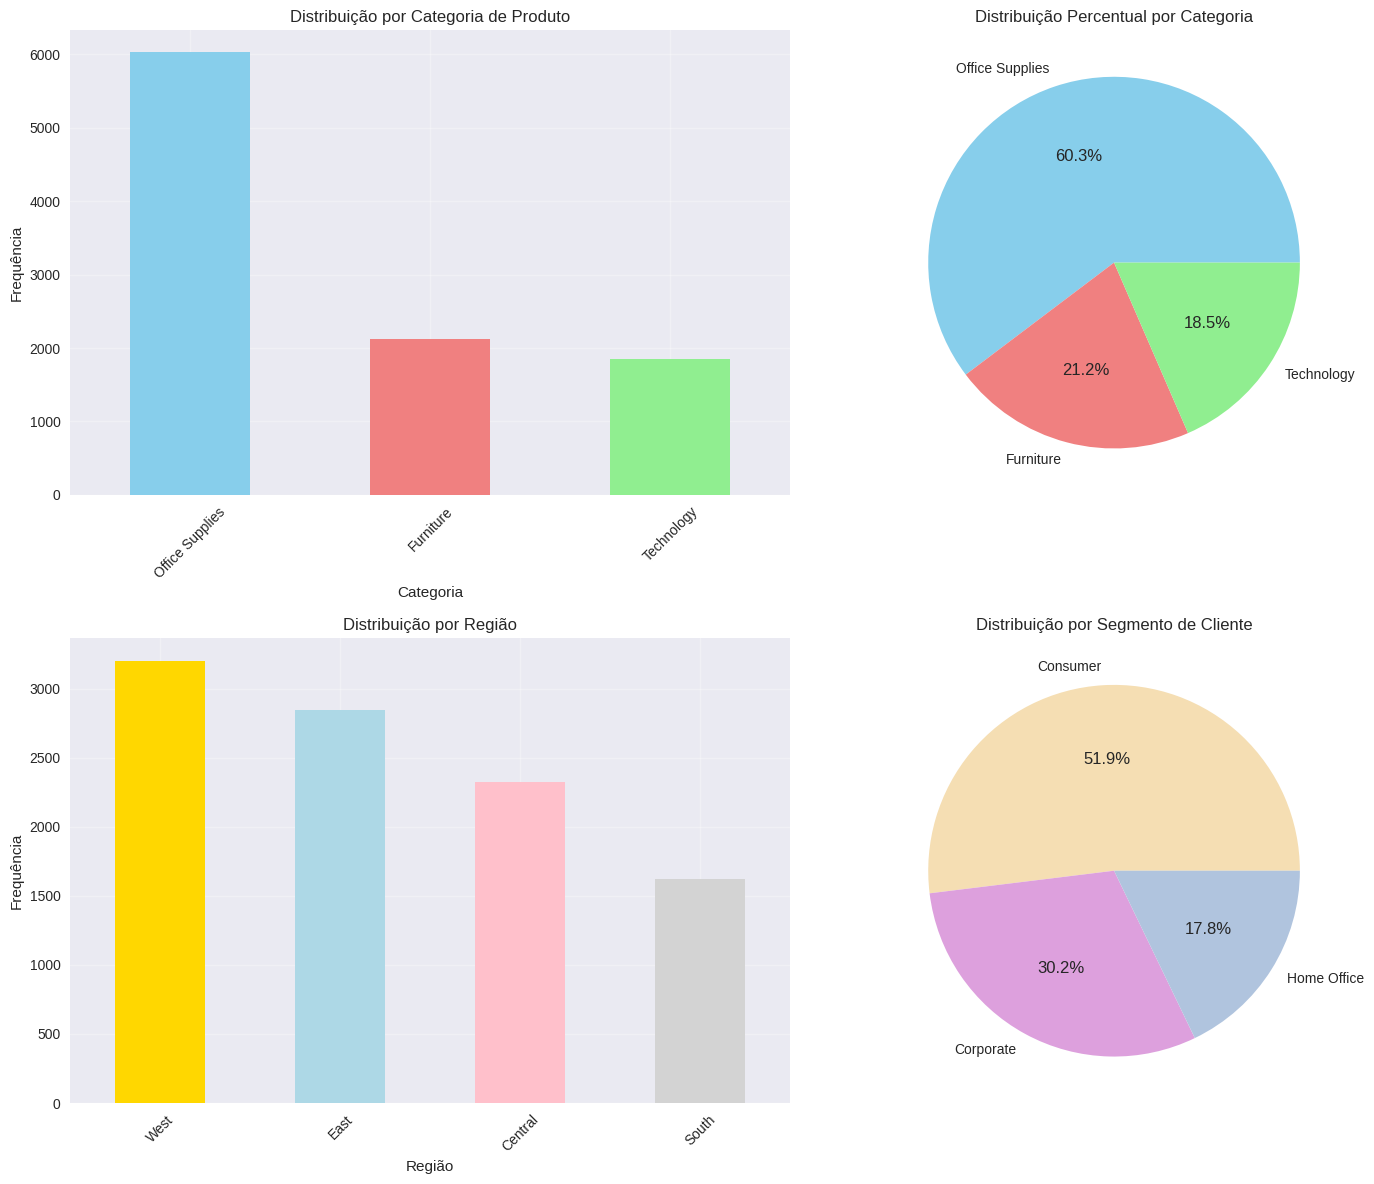

In [ ]:
# Gráficos para variáveis categóricas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico de Barras - Categoria
category_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral', 'lightgreen'])
ax1.set_title('Distribuição por Categoria de Produto')
ax1.set_xlabel('Categoria')
ax1.set_ylabel('Frequência')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Gráfico de Pizza - Categoria
ax2.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral', 'lightgreen'])
ax2.set_title('Distribuição Percentual por Categoria')

# Gráfico de Barras - Região
region_counts = df['Region'].value_counts()
region_counts.plot(kind='bar', ax=ax3, color=['gold', 'lightblue', 'pink', 'lightgray'])
ax3.set_title('Distribuição por Região')
ax3.set_xlabel('Região')
ax3.set_ylabel('Frequência')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Gráfico de Pizza - Segmento
segment_counts = df['Segment'].value_counts()
ax4.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
        colors=['wheat', 'plum', 'lightsteelblue'])
ax4.set_title('Distribuição por Segmento de Cliente')

plt.tight_layout()
plt.show()

## 4. Análise Bivariada

### 4.1 Correlação entre Variáveis Numéricas

A **correlação** mede a força e direção da relação linear entre duas variáveis.
- **r = 1**: Correlação positiva perfeita
- **r = -1**: Correlação negativa perfeita  
- **r = 0**: Ausência de correlação linear
- **|r| > 0.7**: Correlação forte
- **0.3 < |r| < 0.7**: Correlação moderada
- **|r| < 0.3**: Correlação fraca

In [ ]:
# Matriz de correlação
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
correlation_matrix = df[numeric_cols].corr()

print("=== MATRIZ DE CORRELAÇÃO ===")
print(correlation_matrix.round(3))

=== MATRIZ DE CORRELAÇÃO ===
          Sales  Quantity  Discount  Profit
Sales     1.000     0.201    -0.028   0.479
Quantity  0.201     1.000     0.009   0.066
Discount -0.028     0.009     1.000  -0.219
Profit    0.479     0.066    -0.219   1.000


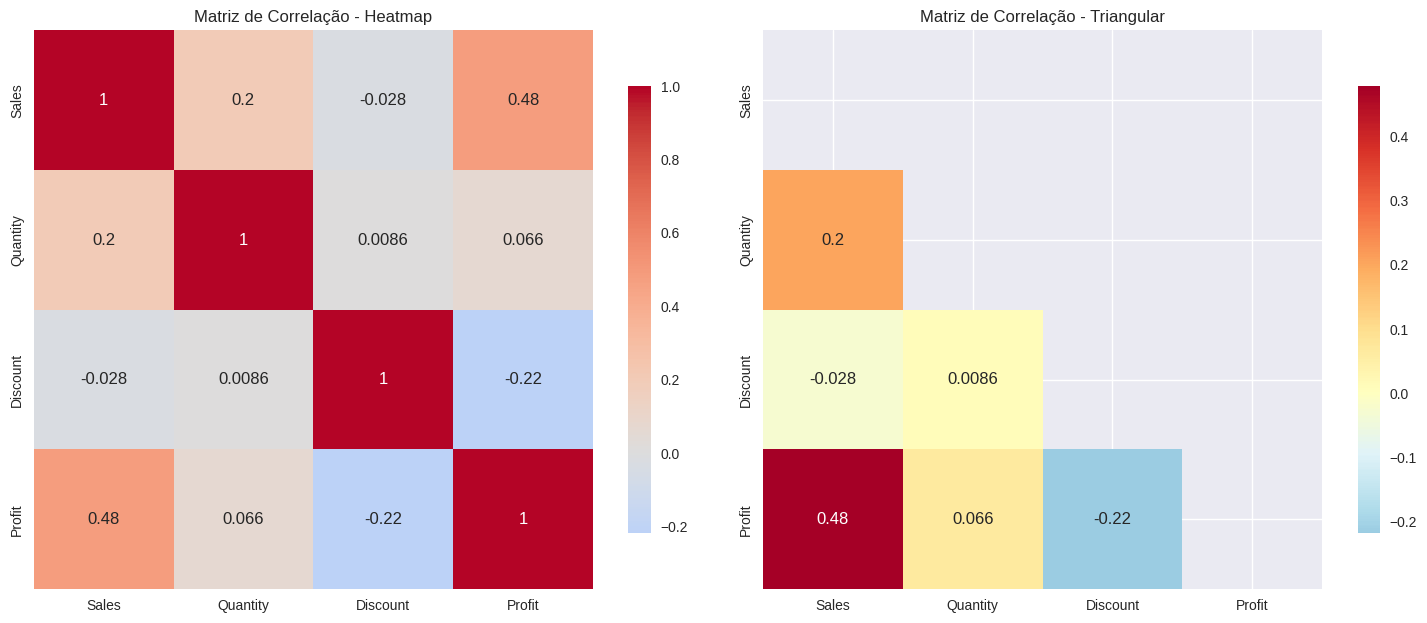

In [ ]:
# Visualização da matriz de correlação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap da correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=ax1, cbar_kws={'shrink': 0.8})
ax1.set_title('Matriz de Correlação - Heatmap')

# Matriz de correlação com diferentes cores
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=ax2, cbar_kws={'shrink': 0.8})
ax2.set_title('Matriz de Correlação - Triangular')

plt.tight_layout()
plt.show()

### 4.2 Análise de Relações Bivariadas

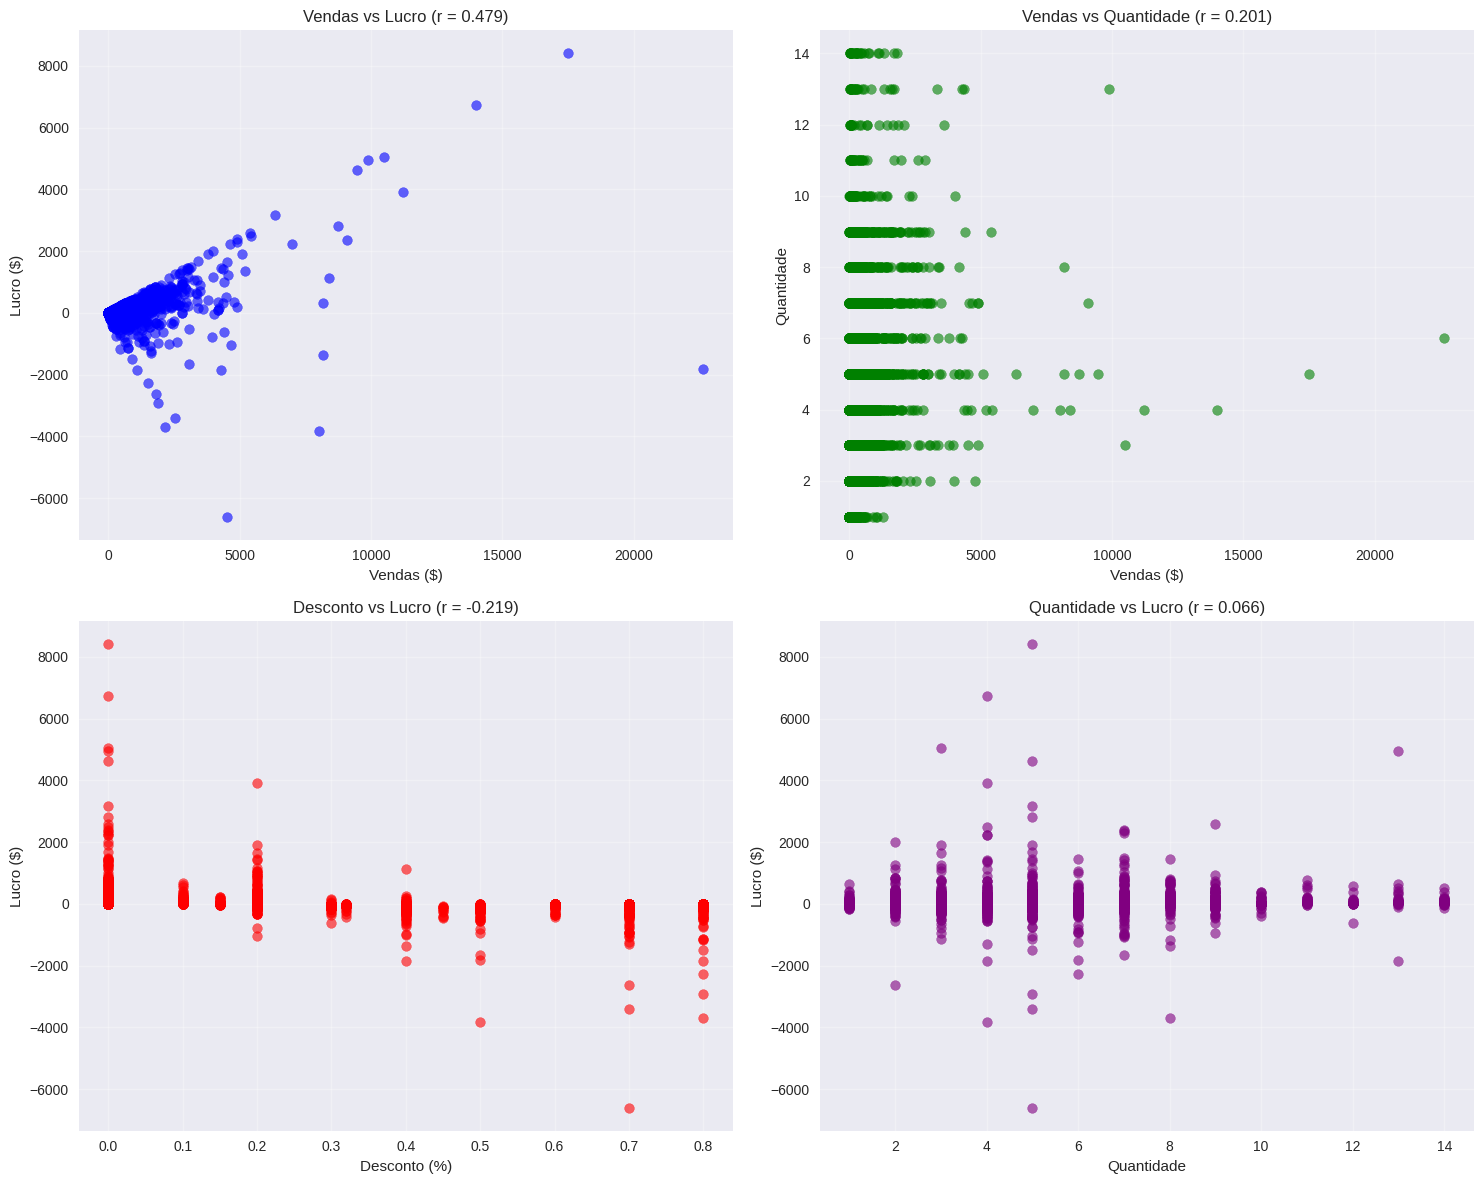

In [ ]:
# Scatter plots para análise bivariada
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Sales vs Profit
ax1.scatter(df['Sales'], df['Profit'], alpha=0.6, color='blue')
ax1.set_xlabel('Vendas ($)')
ax1.set_ylabel('Lucro ($)')
ax1.set_title(f'Vendas vs Lucro (r = {df["Sales"].corr(df["Profit"]):.3f})')
ax1.grid(True, alpha=0.3)

# Sales vs Quantity
ax2.scatter(df['Sales'], df['Quantity'], alpha=0.6, color='green')
ax2.set_xlabel('Vendas ($)')
ax2.set_ylabel('Quantidade')
ax2.set_title(f'Vendas vs Quantidade (r = {df["Sales"].corr(df["Quantity"]):.3f})')
ax2.grid(True, alpha=0.3)

# Discount vs Profit
ax3.scatter(df['Discount'], df['Profit'], alpha=0.6, color='red')
ax3.set_xlabel('Desconto (%)')
ax3.set_ylabel('Lucro ($)')
ax3.set_title(f'Desconto vs Lucro (r = {df["Discount"].corr(df["Profit"]):.3f})')
ax3.grid(True, alpha=0.3)

# Quantity vs Profit
ax4.scatter(df['Quantity'], df['Profit'], alpha=0.6, color='purple')
ax4.set_xlabel('Quantidade')
ax4.set_ylabel('Lucro ($)')
ax4.set_title(f'Quantidade vs Lucro (r = {df["Quantity"].corr(df["Profit"]):.3f})')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3 Análise por Categorias

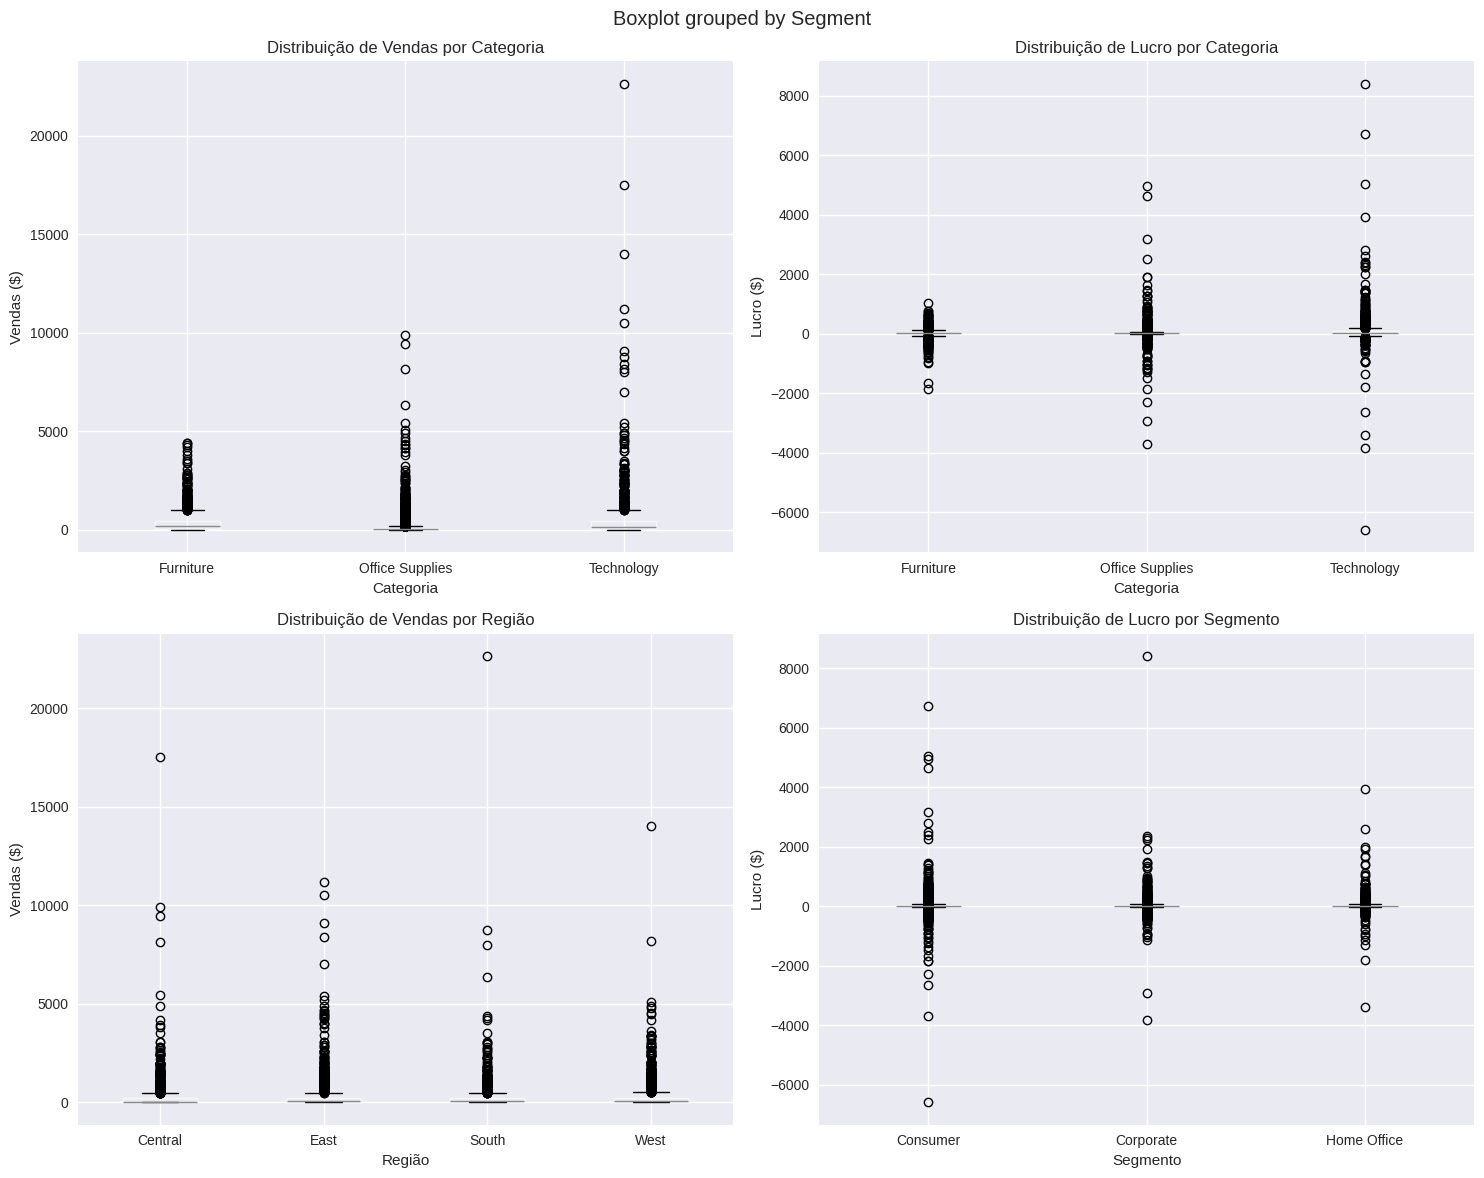

In [ ]:
# Box plots por categoria
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Sales por Category
df.boxplot(column='Sales', by='Category', ax=ax1)
ax1.set_title('Distribuição de Vendas por Categoria')
ax1.set_xlabel('Categoria')
ax1.set_ylabel('Vendas ($)')

# Profit por Category
df.boxplot(column='Profit', by='Category', ax=ax2)
ax2.set_title('Distribuição de Lucro por Categoria')
ax2.set_xlabel('Categoria')
ax2.set_ylabel('Lucro ($)')

# Sales por Region
df.boxplot(column='Sales', by='Region', ax=ax3)
ax3.set_title('Distribuição de Vendas por Região')
ax3.set_xlabel('Região')
ax3.set_ylabel('Vendas ($)')

# Profit por Segment
df.boxplot(column='Profit', by='Segment', ax=ax4)
ax4.set_title('Distribuição de Lucro por Segmento')
ax4.set_xlabel('Segmento')
ax4.set_ylabel('Lucro ($)')

plt.tight_layout()
plt.show()

## 5. Análise Estatística Avançada

### 5.1 Teste de Normalidade

In [ ]:
# Testes de normalidade
print("=== TESTES DE NORMALIDADE ===")

# Teste de Shapiro-Wilk (para amostras pequenas)
# Teste de Kolmogorov-Smirnov (para amostras grandes)

for col in ['Sales', 'Profit', 'Quantity', 'Discount']:
    # Usando Kolmogorov-Smirnov por ter amostra grande
    statistic, p_value = stats.kstest(df[col].dropna(), 'norm',
                                     args=(df[col].mean(), df[col].std()))

    print(f"\n{col}:")
    print(f"  Estatística KS: {statistic:.4f}")
    print(f"  P-valor: {p_value:.4e}")
    print(f"  Resultado: {'Normal' if p_value > 0.05 else 'Não Normal'} (α = 0.05)")
    print(f"  Assimetria: {df[col].skew():.3f}")
    print(f"  Curtose: {df[col].kurtosis():.3f}")

=== TESTES DE NORMALIDADE ===

Sales:
  Estatística KS: 0.3564
  P-valor: 0.0000e+00
  Resultado: Não Normal (α = 0.05)
  Assimetria: 12.973
  Curtose: 305.312

Profit:
  Estatística KS: 0.3308
  P-valor: 0.0000e+00
  Resultado: Não Normal (α = 0.05)
  Assimetria: 7.561
  Curtose: 397.189

Quantity:
  Estatística KS: 0.2100
  P-valor: 0.0000e+00
  Resultado: Não Normal (α = 0.05)
  Assimetria: 1.279
  Curtose: 1.992

Discount:
  Estatística KS: 0.2766
  P-valor: 0.0000e+00
  Resultado: Não Normal (α = 0.05)
  Assimetria: 1.684
  Curtose: 2.410


### 5.2 Análise de Outliers

In [ ]:
# Detecção de outliers usando IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=== ANÁLISE DE OUTLIERS (Método IQR) ===")

for col in ['Sales', 'Profit', 'Quantity']:
    outliers, lower, upper = detect_outliers_iqr(df[col])
    print(f"\n{col}:")
    print(f"  Limite Inferior: {lower:.2f}")
    print(f"  Limite Superior: {upper:.2f}")
    print(f"  Número de Outliers: {len(outliers)}")
    print(f"  Percentual de Outliers: {len(outliers)/len(df)*100:.2f}%")

=== ANÁLISE DE OUTLIERS (Método IQR) ===

Sales:
  Limite Inferior: -271.71
  Limite Superior: 498.93
  Número de Outliers: 1167
  Percentual de Outliers: 11.68%

Profit:
  Limite Inferior: -39.72
  Limite Superior: 70.82
  Número de Outliers: 1881
  Percentual de Outliers: 18.82%

Quantity:
  Limite Inferior: -2.50
  Limite Superior: 9.50
  Número de Outliers: 170
  Percentual de Outliers: 1.70%


### 5.3 Estatísticas por Grupo

In [ ]:
# Estatísticas descritivas por categoria
print("=== ESTATÍSTICAS POR CATEGORIA ===")
stats_by_category = df.groupby('Category').agg({
    'Sales': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Profit': ['mean', 'median', 'std'],
    'Quantity': ['mean', 'median', 'std']
}).round(2)

print(stats_by_category)

=== ESTATÍSTICAS POR CATEGORIA ===
                Sales                                          Profit         \
                count    mean  median      std   min       max   mean median   
Category                                                                       
Furniture        2121  349.83  182.22   503.18  1.89   4416.17   8.70   7.77   
Office Supplies  6026  119.32   27.42   382.18  0.44   9892.74  20.33   6.88   
Technology       1847  452.71  166.16  1108.66  0.99  22638.48  78.75  25.02   

                        Quantity               
                    std     mean median   std  
Category                                       
Furniture        136.05     3.79    3.0  2.25  
Office Supplies  164.89     3.80    3.0  2.22  
Technology       428.82     3.76    3.0  2.22  


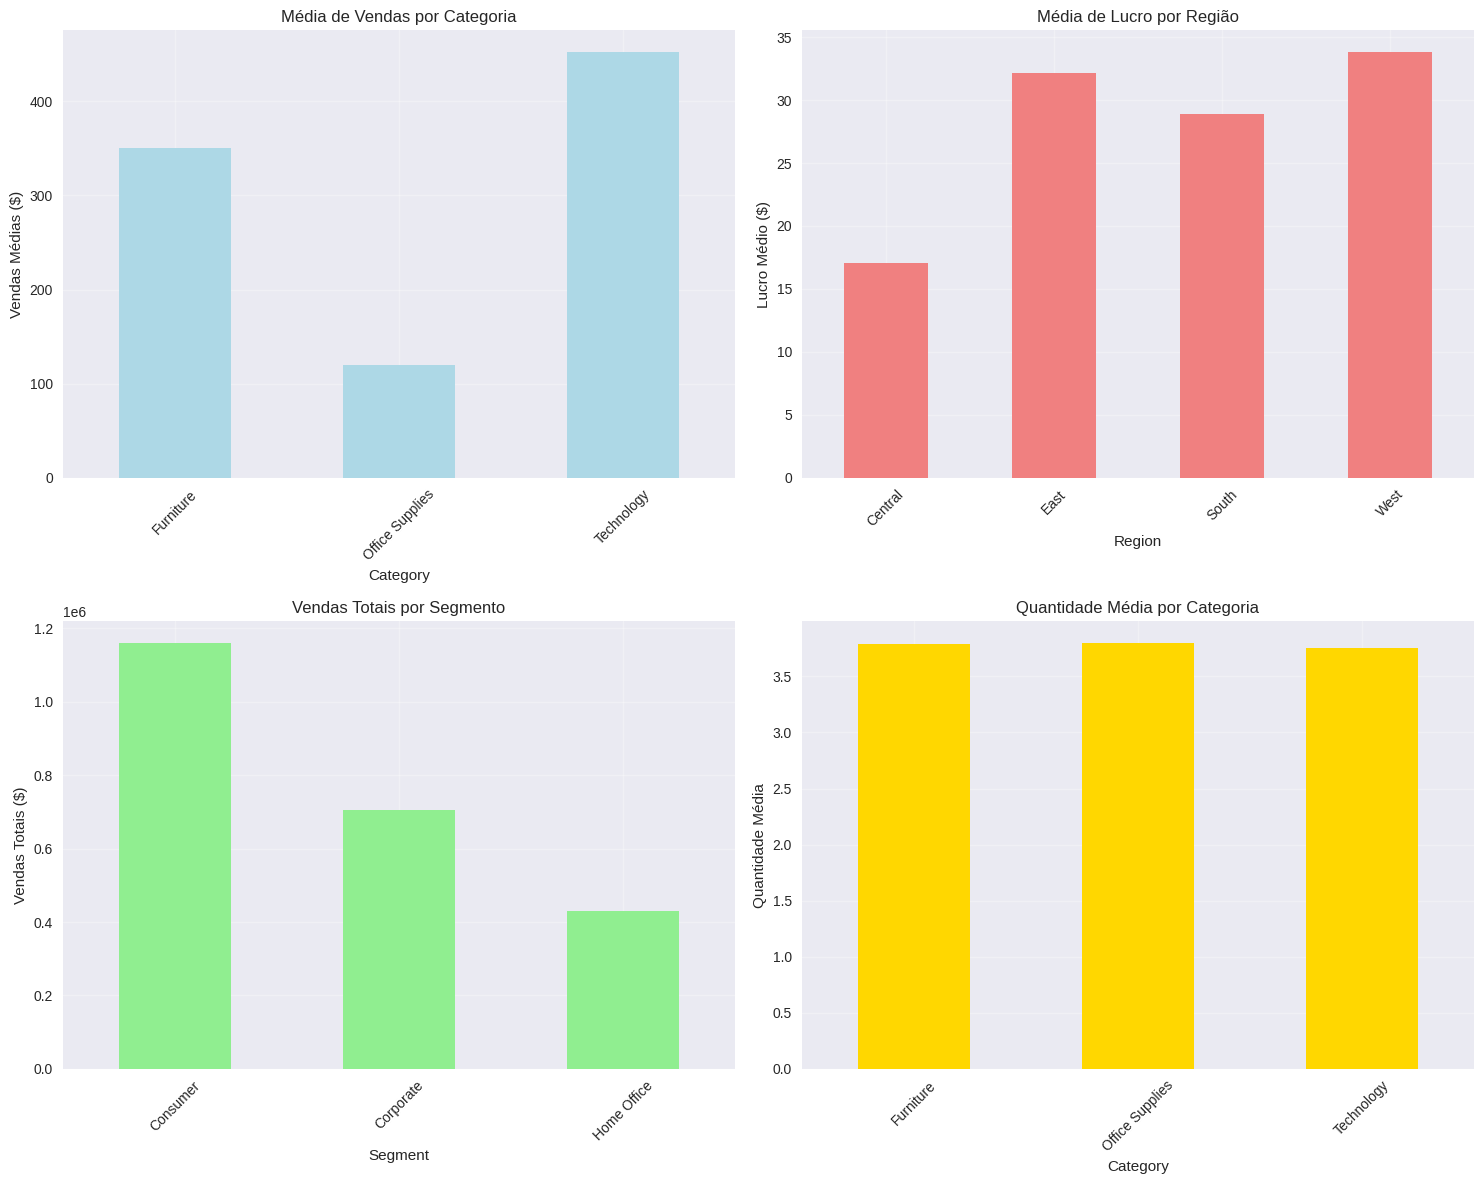

In [ ]:
# Visualização das estatísticas por grupo
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Média de vendas por categoria
category_sales_mean = df.groupby('Category')['Sales'].mean()
category_sales_mean.plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Média de Vendas por Categoria')
ax1.set_ylabel('Vendas Médias ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Média de lucro por região
region_profit_mean = df.groupby('Region')['Profit'].mean()
region_profit_mean.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Média de Lucro por Região')
ax2.set_ylabel('Lucro Médio ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Vendas totais por segmento
segment_sales_total = df.groupby('Segment')['Sales'].sum()
segment_sales_total.plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Vendas Totais por Segmento')
ax3.set_ylabel('Vendas Totais ($)')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Quantidade média por categoria
category_qty_mean = df.groupby('Category')['Quantity'].mean()
category_qty_mean.plot(kind='bar', ax=ax4, color='gold')
ax4.set_title('Quantidade Média por Categoria')
ax4.set_ylabel('Quantidade Média')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Interpretação dos Resultados

### 6.1 Resumo das Principais Descobertas

In [ ]:
print("=== RESUMO EXECUTIVO DA ANÁLISE ===")
print("\n1. VENDAS:")
print(f"   - Média: ${df['Sales'].mean():.2f}")
print(f"   - Mediana: ${df['Sales'].median():.2f}")
print(f"   - Variabilidade: {(df['Sales'].std()/df['Sales'].mean())*100:.1f}%")
print(f"   - Distribuição: {'Assimétrica positiva' if df['Sales'].skew() > 0.5 else 'Aproximadamente simétrica'}")

print("\n2. LUCRO:")
print(f"   - Média: ${df['Profit'].mean():.2f}")
print(f"   - Mediana: ${df['Profit'].median():.2f}")
print(f"   - Margem média: {(df['Profit'].mean()/df['Sales'].mean())*100:.1f}%")

print("\n3. CORRELAÇÕES MAIS FORTES:")
corr_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
# Encontrar a correlação mais forte (excluindo diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_values = corr_matrix.mask(mask).stack().abs().sort_values(ascending=False)
print(f"   - {corr_values.index[0]}: {corr_values.iloc[0]:.3f}")

print("\n4. CATEGORIA MAIS LUCRATIVA:")
profit_by_category = df.groupby('Category')['Profit'].mean().sort_values(ascending=False)
print(f"   - {profit_by_category.index[0]}: ${profit_by_category.iloc[0]:.2f}")

print("\n5. REGIÃO COM MAIOR VOLUME:")
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(f"   - {sales_by_region.index[0]}: ${sales_by_region.iloc[0]:,.2f}")

=== RESUMO EXECUTIVO DA ANÁLISE ===

1. VENDAS:
   - Média: $229.86
   - Mediana: $54.49
   - Variabilidade: 271.1%
   - Distribuição: Assimétrica positiva

2. LUCRO:
   - Média: $28.66
   - Mediana: $8.67
   - Margem média: 12.5%

3. CORRELAÇÕES MAIS FORTES:
   - ('Profit', 'Sales'): 0.479

4. CATEGORIA MAIS LUCRATIVA:
   - Technology: $78.75

5. REGIÃO COM MAIOR VOLUME:
   - West: $725,457.82


### 6.2 Recomendações de Negócio

Baseado na análise estatística realizada, podemos extrair insights valiosos:

1. **Gestão de Estoque**: A análise da variabilidade ajuda a otimizar níveis de estoque
2. **Precificação**: A correlação entre desconto e lucro orienta estratégias de preço
3. **Foco Regional**: Identificação das regiões mais rentáveis para investimento
4. **Mix de Produtos**: Priorização de categorias com melhor performance

### 6.3 Limitações da Análise

É importante considerar as limitações desta análise:

- **Causalidade**: Correlação não implica causalidade
- **Dados Faltantes**: Podem impactar os resultados
- **Outliers**: Podem distorcer medidas estatísticas
- **Sazonalidade**: Não foi considerada nesta análise temporal

## 7. Conclusão

Esta análise demonstrou a aplicação prática de conceitos estatísticos fundamentais em dados reais de negócios. Os insights obtidos através das medidas de tendência central, dispersão, correlação e visualizações gráficas fornecem uma base sólida para tomada de decisões empresariais baseadas em dados.

A combinação de análise univariada e bivariada permitiu compreender tanto o comportamento individual das variáveis quanto suas inter-relações, revelando padrões importantes que podem ser explorados estrategicamente pela empresa.

### Próximos Passos

1. **Análise Temporal**: Incluir componente temporal para identificar tendências
2. **Modelagem Preditiva**: Desenvolver modelos para previsão de vendas e lucro
3. **Segmentação**: Análise mais profunda de segmentação de clientes
4. **Testes A/B**: Implementar testes para validar hipóteses de negócio